### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import imdb

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000, random_state = 42)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

###BASE MODEL:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.7069 - loss: 0.6033 - val_accuracy: 0.8642 - val_loss: 0.4037
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8884 - loss: 0.3543 - val_accuracy: 0.8819 - val_loss: 0.3213
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9154 - loss: 0.2558 - val_accuracy: 0.8875 - val_loss: 0.2858
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9318 - loss: 0.2029 - val_accuracy: 0.8863 - val_loss: 0.2776
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9479 - loss: 0.1666 - val_accuracy: 0.8873 - val_loss: 0.2783
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9548 - loss: 0.1438 - val_accuracy: 0.8841 - val_loss: 0.2865
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9622 - loss: 0.1235 - val_accuracy: 0.8850 - val_loss: 0.2947
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9707 - loss: 0.1029 - val_accuracy: 0.8827 - v

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

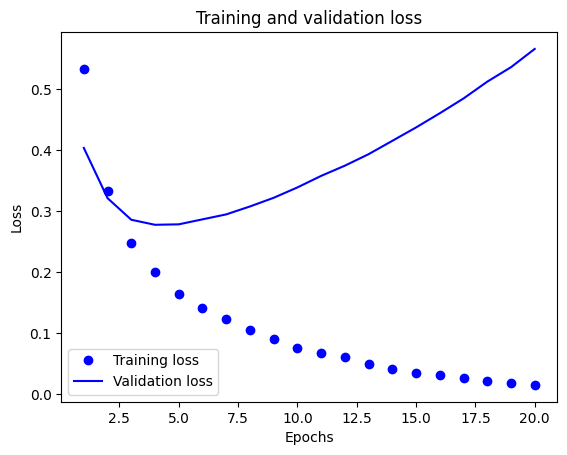

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

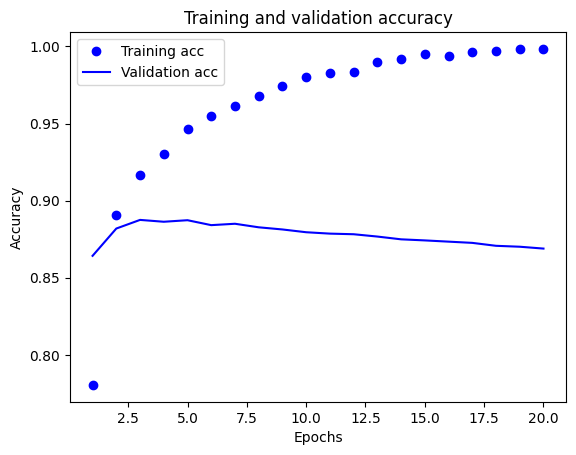

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(16, activation="relu",kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7358 - loss: 0.5557
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8980 - loss: 0.2921
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9198 - loss: 0.2221
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9324 - loss: 0.1881
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8837 - loss: 0.2875


In [ ]:
results

[0.2865942418575287, 0.8843600153923035]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.3166179 ],
       [0.9996444 ],
       [0.90840226],
       ...,
       [0.11266682],
       [0.08859441],
       [0.6818052 ]], dtype=float32)

### Model 1


**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model1 = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Removal of one layer layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.7409 - loss: 0.5707 - val_accuracy: 0.8618 - val_loss: 0.3993
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8920 - loss: 0.3507 - val_accuracy: 0.8809 - val_loss: 0.3291
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9164 - loss: 0.2711 - val_accuracy: 0.8884 - val_loss: 0.2980
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9295 - loss: 0.2245 - val_accuracy: 0.8896 - val_loss: 0.2840
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9387 - loss: 0.1940 - val_accuracy: 0.8881 - val_loss: 0.2775
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9485 - loss: 0.1710 - val_accuracy: 0.8868 - val_loss: 0.2776
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9549 - loss: 0.1531 - val_accuracy: 0.8874 - val_loss: 0.2787
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9588 - loss: 0.1387 - val_accuracy: 0.8864 - v

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

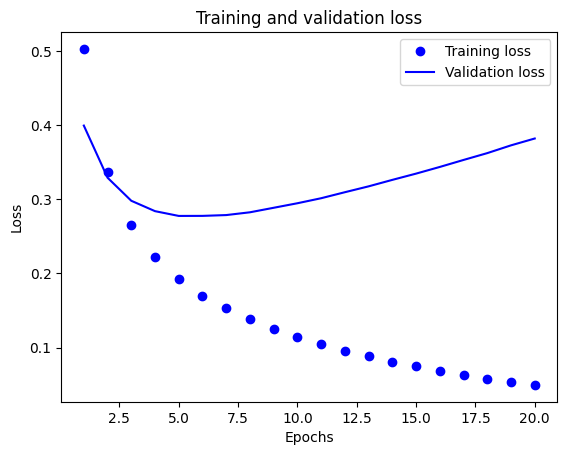

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

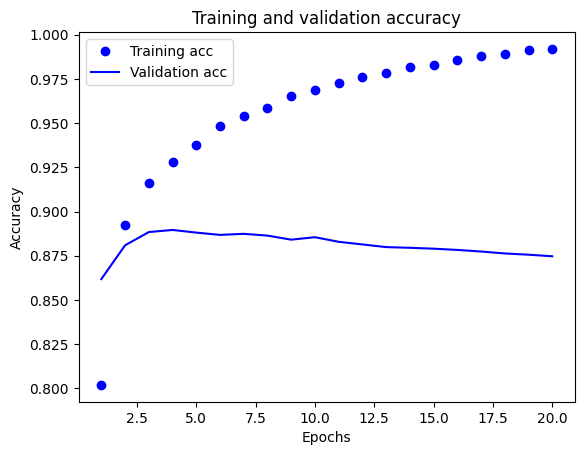

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(x_train, y_train, epochs=4, batch_size=512)
results = model1.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7536 - loss: 0.5359
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8961 - loss: 0.3020
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9168 - loss: 0.2396
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9279 - loss: 0.2075
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8859 - loss: 0.2817


In [ ]:
results

[0.2802591621875763, 0.8878800272941589]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model1.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.30173188],
       [0.9990613 ],
       [0.86321753],
       ...,
       [0.13518108],
       [0.12428896],
       [0.5705283 ]], dtype=float32)

### Model 2:

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model2 = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
     layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.7199 - loss: 0.6012 - val_accuracy: 0.8676 - val_loss: 0.3890
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8900 - loss: 0.3376 - val_accuracy: 0.8856 - val_loss: 0.3028
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9239 - loss: 0.2354 - val_accuracy: 0.8874 - val_loss: 0.2834
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9411 - loss: 0.1846 - val_accuracy: 0.8871 - val_loss: 0.2782
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9478 - loss: 0.1556 - val_accuracy: 0.8869 - val_loss: 0.2845
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9606 - loss: 0.1275 - val_accuracy: 0.8840 - val_loss: 0.2969
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9685 - loss: 0.1043 - val_accuracy: 0.8826 - val_loss: 0.3147
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9714 - loss: 0.0925 - val_accuracy: 0.8791 - 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

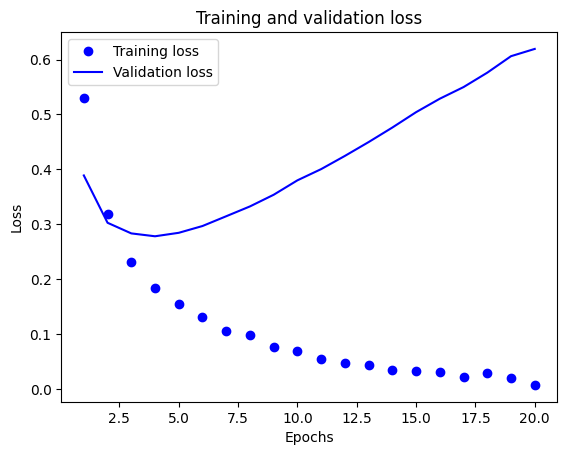

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

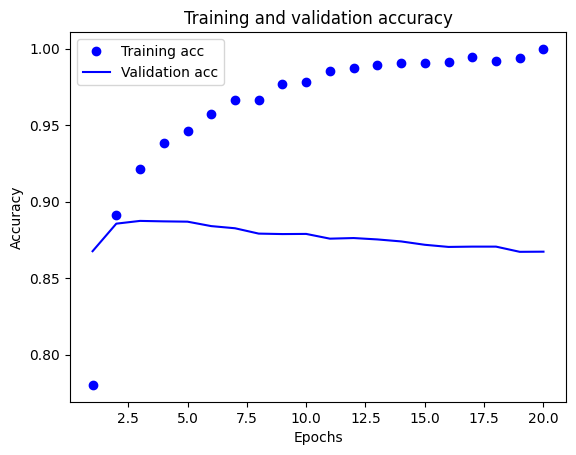

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model2 = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model2.fit(x_train, y_train, epochs=3, batch_size=512)
results = model2.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7482 - loss: 0.5612
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8969 - loss: 0.2866
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9198 - loss: 0.2140
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8837 - loss: 0.2881


In [ ]:
results

[0.2802591621875763, 0.8878800272941589]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model2.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.30173188],
       [0.9990613 ],
       [0.86321753],
       ...,
       [0.13518108],
       [0.12428896],
       [0.5705283 ]], dtype=float32)

###Model 3 :

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model3 = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
     layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.6767 - loss: 0.6034 - val_accuracy: 0.8723 - val_loss: 0.3620
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8815 - loss: 0.3259 - val_accuracy: 0.8891 - val_loss: 0.2902
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9155 - loss: 0.2335 - val_accuracy: 0.8888 - val_loss: 0.2795
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9435 - loss: 0.1678 - val_accuracy: 0.8890 - val_loss: 0.2802
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9500 - loss: 0.1425 - val_accuracy: 0.8874 - val_loss: 0.2909
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9589 - loss: 0.1205 - val_accuracy: 0.8847 - val_loss: 0.3011
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9766 - loss: 0.0834 - val_accuracy: 0.8830 - val_loss: 0.3203
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9806 - loss: 0.0715 - val_accuracy: 0.8832 - 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

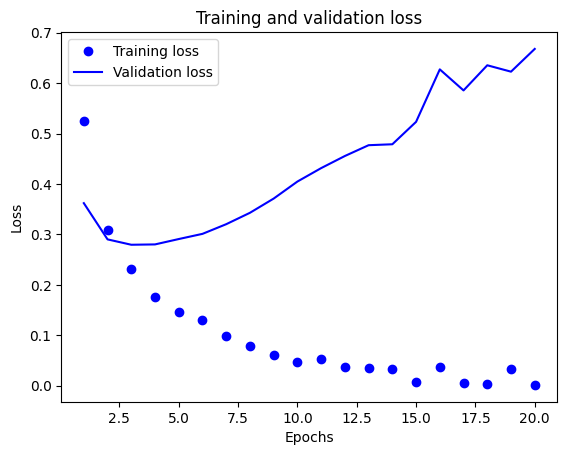

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

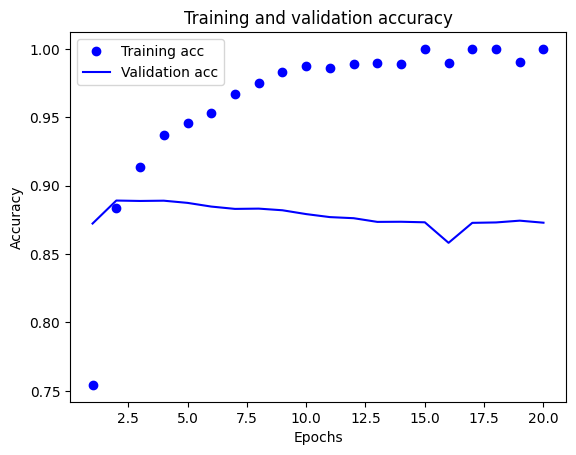

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model3 = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model3.fit(x_train, y_train, epochs=4, batch_size=512)
results = model3.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7129 - loss: 0.5490
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8943 - loss: 0.2781
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9186 - loss: 0.2153
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9308 - loss: 0.1811
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8797 - loss: 0.3069


In [ ]:
results

[0.3057752847671509, 0.8813599944114685]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model3.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.2396828 ],
       [0.9995869 ],
       [0.9004377 ],
       ...,
       [0.13986532],
       [0.08131877],
       [0.8239099 ]], dtype=float32)

###Model 4:

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model4 = keras.Sequential([
    layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
     layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.6698 - loss: 0.6069 - val_accuracy: 0.8705 - val_loss: 0.3434
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8826 - loss: 0.3101 - val_accuracy: 0.8846 - val_loss: 0.2874
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9147 - loss: 0.2249 - val_accuracy: 0.8884 - val_loss: 0.2748
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9313 - loss: 0.1797 - val_accuracy: 0.8887 - val_loss: 0.2805
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9557 - loss: 0.1282 - val_accuracy: 0.8863 - val_loss: 0.2994
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9663 - loss: 0.1002 - val_accuracy: 0.8828 - val_loss: 0.3134
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9791 - loss: 0.0722 - val_accuracy: 0.8793 - val_loss: 0.3264
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9861 - loss: 0.0537 - val_accuracy: 0.8811 - 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

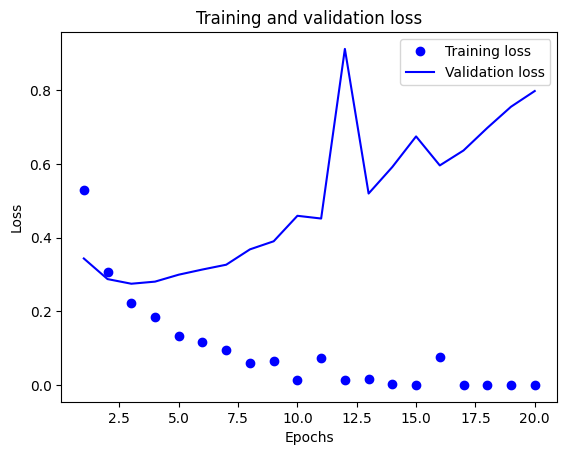

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

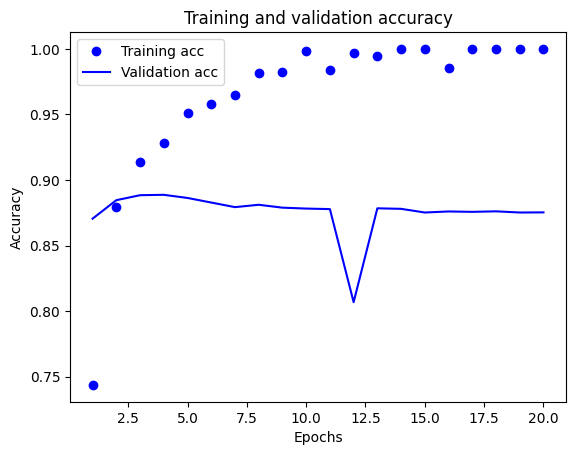

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model4 = keras.Sequential([
    layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model4.fit(x_train, y_train, epochs=4, batch_size=512)
results = model4.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7012 - loss: 0.5509
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8867 - loss: 0.2870
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9155 - loss: 0.2092
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9332 - loss: 0.1699
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8820 - loss: 0.3041


In [ ]:
results

[0.3014732897281647, 0.8829200267791748]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model4.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.13079534],
       [0.9998797 ],
       [0.9129671 ],
       ...,
       [0.04574255],
       [0.04385862],
       [0.75321376]], dtype=float32)

### Model 5 :

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model5 = keras.Sequential([
    layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.6939 - loss: 0.5773 - val_accuracy: 0.8712 - val_loss: 0.3567
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8965 - loss: 0.3122 - val_accuracy: 0.8856 - val_loss: 0.2978
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9203 - loss: 0.2385 - val_accuracy: 0.8817 - val_loss: 0.2920
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9255 - loss: 0.2096 - val_accuracy: 0.8880 - val_loss: 0.2775
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9366 - loss: 0.1801 - val_accuracy: 0.8875 - val_loss: 0.2766
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9488 - loss: 0.1557 - val_accuracy: 0.8841 - val_loss: 0.2807
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9584 - loss: 0.1363 - val_accuracy: 0.8853 - val_loss: 0.2881
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9546 - loss: 0.1318 - val_accuracy: 0.8823 - v

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

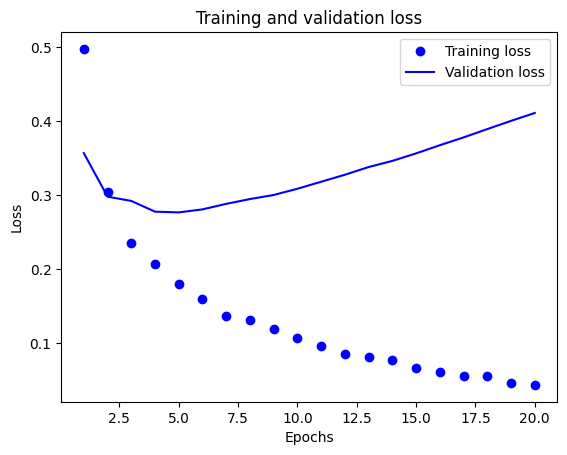

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

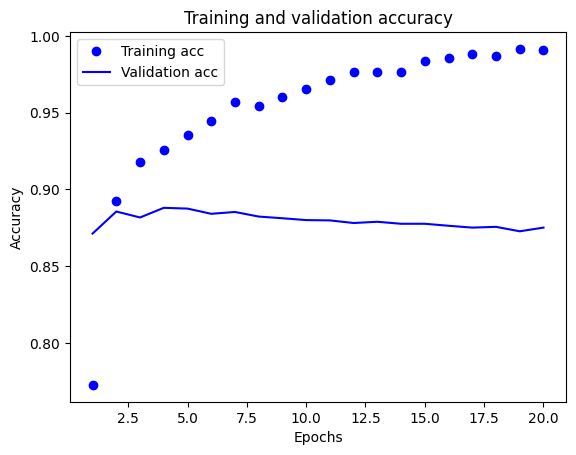

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model5 = keras.Sequential([
    layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model5.fit(x_train, y_train, epochs=4, batch_size=512)
results = model5.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7290 - loss: 0.5292
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8973 - loss: 0.2790
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9155 - loss: 0.2253
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9260 - loss: 0.2015
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8831 - loss: 0.2907


In [ ]:
results

[0.28803542256355286, 0.8846799731254578]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model5.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.29374263],
       [0.999851  ],
       [0.897695  ],
       ...,
       [0.12857766],
       [0.11410368],
       [0.6658285 ]], dtype=float32)

### Model 6 :

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model6 = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model6.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model6.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.6970 - loss: 0.5823 - val_accuracy: 0.8673 - val_loss: 0.3823
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8947 - loss: 0.3326 - val_accuracy: 0.8824 - val_loss: 0.3137
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9164 - loss: 0.2571 - val_accuracy: 0.8859 - val_loss: 0.2893
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9293 - loss: 0.2144 - val_accuracy: 0.8828 - val_loss: 0.2888
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9390 - loss: 0.1870 - val_accuracy: 0.8876 - val_loss: 0.2768
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9474 - loss: 0.1656 - val_accuracy: 0.8857 - val_loss: 0.2785
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9530 - loss: 0.1485 - val_accuracy: 0.8855 - val_loss: 0.2826
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9615 - loss: 0.1313 - val_accuracy: 0.8840 - v

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

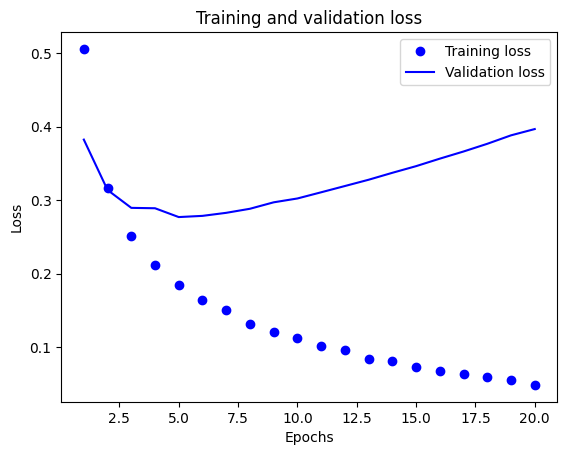

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

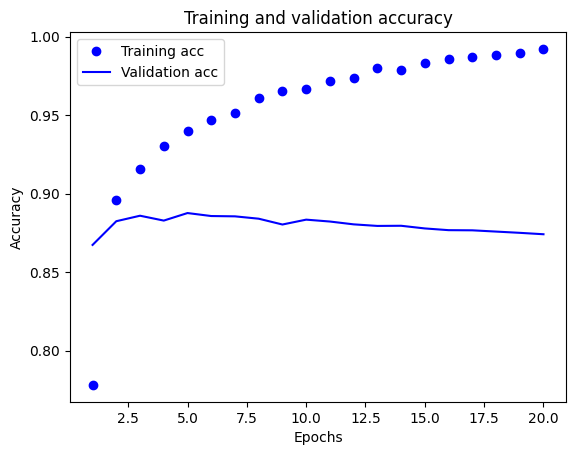

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model6 = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model6.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model6.fit(x_train, y_train, epochs=5, batch_size=512)
results = model6.evaluate(x_test, y_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7401 - loss: 0.5326
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8982 - loss: 0.2910
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9172 - loss: 0.2321
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9271 - loss: 0.2030
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9347 - loss: 0.1831
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8819 - loss: 0.2897


In [ ]:
results

[0.2875302731990814, 0.8843200206756592]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model6.predict(x_test)

### Model 7 :

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model7 = keras.Sequential([
    layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model7.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model7.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.7072 - loss: 0.5836 - val_accuracy: 0.8712 - val_loss: 0.3488
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8892 - loss: 0.3096 - val_accuracy: 0.8872 - val_loss: 0.2892
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9216 - loss: 0.2256 - val_accuracy: 0.8842 - val_loss: 0.2847
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9369 - loss: 0.1823 - val_accuracy: 0.8873 - val_loss: 0.2744
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9476 - loss: 0.1512 - val_accuracy: 0.8827 - val_loss: 0.2924
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9534 - loss: 0.1345 - val_accuracy: 0.8846 - val_loss: 0.2933
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9628 - loss: 0.1099 - val_accuracy: 0.8819 - val_loss: 0.3075
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9730 - loss: 0.0845 - val_accuracy: 0.8804 - 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

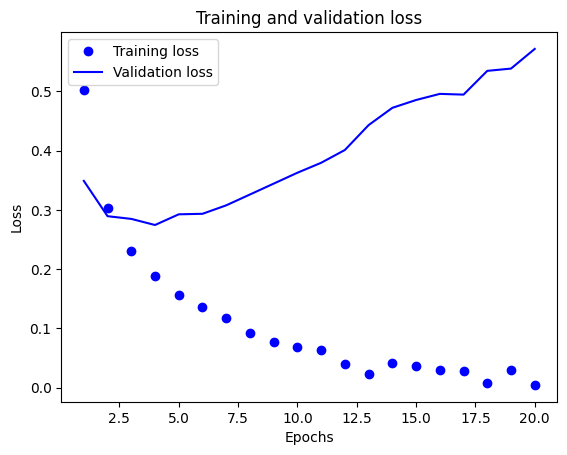

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

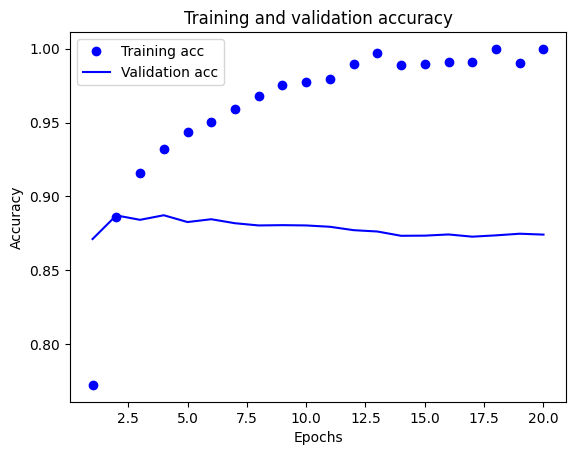

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model7 = keras.Sequential([
    layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model7.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model7.fit(x_train, y_train, epochs=4, batch_size=512)
results = model7.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7201 - loss: 0.5384
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8969 - loss: 0.2749
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9171 - loss: 0.2150
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9279 - loss: 0.1832
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8801 - loss: 0.2990


In [ ]:
results

[0.2969222366809845, 0.8816400170326233]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model7.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.22896641],
       [0.9995782 ],
       [0.90569663],
       ...,
       [0.11521466],
       [0.06244768],
       [0.7644232 ]], dtype=float32)

### Model 8 :

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model8 = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model8.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model8.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.6939 - loss: 0.2055 - val_accuracy: 0.8602 - val_loss: 0.1259
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8842 - loss: 0.1106 - val_accuracy: 0.8784 - val_loss: 0.1021
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9112 - loss: 0.0842 - val_accuracy: 0.8770 - val_loss: 0.0976
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9192 - loss: 0.0735 - val_accuracy: 0.8824 - val_loss: 0.0894
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9312 - loss: 0.0633 - val_accuracy: 0.8853 - val_loss: 0.0862
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9408 - loss: 0.0566 - val_accuracy: 0.8828 - val_loss: 0.0859
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9463 - loss: 0.0519 - val_accuracy: 0.8853 - val_loss: 0.0845
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9511 - loss: 0.0481 - val_accuracy: 0.8834 - v

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

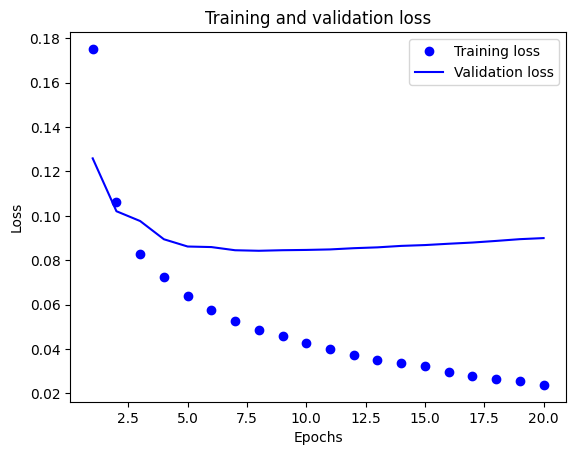

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

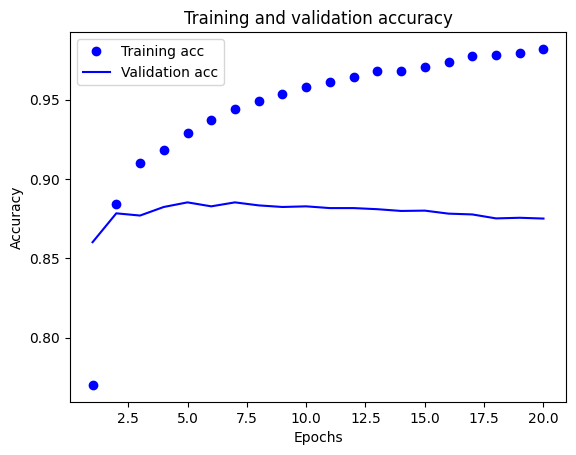

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model8 = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model8.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model8.fit(x_train, y_train, epochs=7, batch_size=512)
results = model8.evaluate(x_test, y_test)

Epoch 1/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7322 - loss: 0.1857
Epoch 2/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8910 - loss: 0.0950
Epoch 3/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9090 - loss: 0.0759
Epoch 4/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9199 - loss: 0.0673
Epoch 5/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9290 - loss: 0.0610
Epoch 6/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9353 - loss: 0.0561
Epoch 7/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9420 - loss: 0.0523
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8823 - loss: 0.0868


In [ ]:
results

[0.08578227460384369, 0.8846399784088135]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model8.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.19420409],
       [0.9989752 ],
       [0.9228016 ],
       ...,
       [0.17904274],
       [0.09835995],
       [0.6161837 ]], dtype=float32)

### Model 9 :

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model9 = keras.Sequential([
    layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model9.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model9.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.6560 - loss: 0.6086 - val_accuracy: 0.8681 - val_loss: 0.3455
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8717 - loss: 0.3296 - val_accuracy: 0.8864 - val_loss: 0.2842
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9144 - loss: 0.2334 - val_accuracy: 0.8860 - val_loss: 0.2836
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9350 - loss: 0.1801 - val_accuracy: 0.8889 - val_loss: 0.2797
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9452 - loss: 0.1482 - val_accuracy: 0.8866 - val_loss: 0.2882
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9624 - loss: 0.1157 - val_accuracy: 0.8841 - val_loss: 0.3091
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9700 - loss: 0.0924 - val_accuracy: 0.8828 - val_loss: 0.3356
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9733 - loss: 0.0766 - val_accuracy: 0.8782 - 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

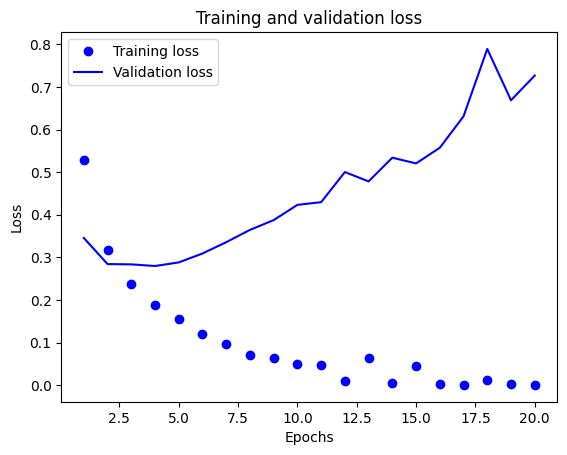

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

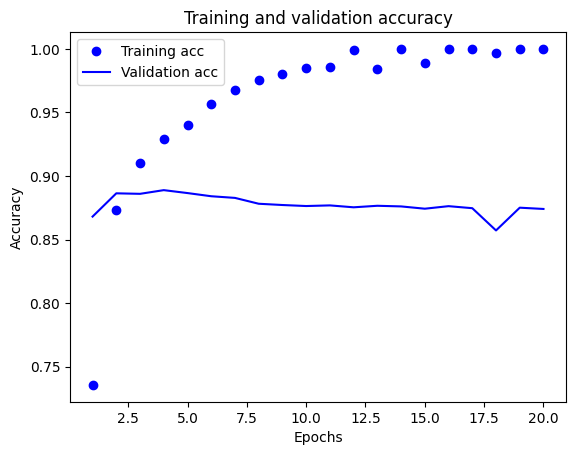

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model9 = keras.Sequential([
    layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model9.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model9.fit(x_train, y_train, epochs=4, batch_size=512)
results = model9.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7041 - loss: 0.5605
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8907 - loss: 0.2771
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9197 - loss: 0.2125
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9268 - loss: 0.1810
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8829 - loss: 0.2985


In [ ]:
results

[0.2837504744529724, 0.8852400183677673]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model9.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.1218373 ],
       [0.9991786 ],
       [0.853833  ],
       ...,
       [0.07720467],
       [0.07274885],
       [0.5312903 ]], dtype=float32)

### Model 10 :

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model10 = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
     layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model10.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model10.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6873 - loss: 0.2055 - val_accuracy: 0.8297 - val_loss: 0.1309
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8776 - loss: 0.1034 - val_accuracy: 0.8781 - val_loss: 0.0964
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9067 - loss: 0.0780 - val_accuracy: 0.8840 - val_loss: 0.0873
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9296 - loss: 0.0593 - val_accuracy: 0.8727 - val_loss: 0.0942
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9391 - loss: 0.0535 - val_accuracy: 0.8879 - val_loss: 0.0831
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9427 - loss: 0.0475 - val_accuracy: 0.8854 - val_loss: 0.0831
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9590 - loss: 0.0387 - val_accuracy: 0.8841 - val_loss: 0.0843
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9657 - loss: 0.0335 - val_accuracy: 0.8834 - v

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

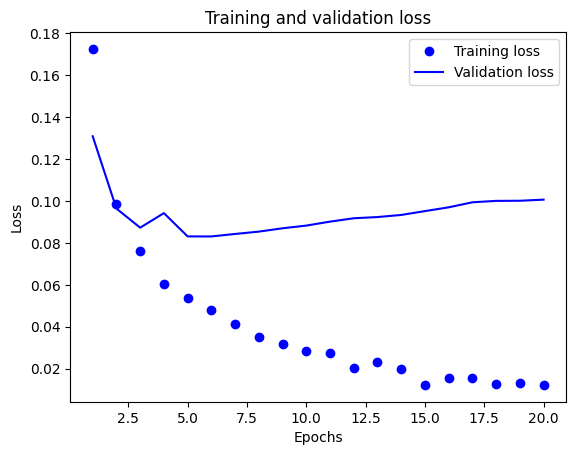

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

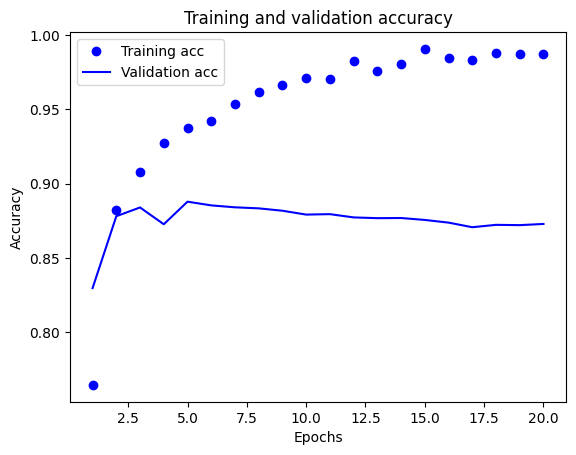

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model10 = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model10.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model10.fit(x_train, y_train, epochs=5, batch_size=512)
results = model10.evaluate(x_test, y_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7283 - loss: 0.1869
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8897 - loss: 0.0894
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9128 - loss: 0.0688
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9297 - loss: 0.0574
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9382 - loss: 0.0511
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8808 - loss: 0.0867


In [ ]:
results

[0.08627662807703018, 0.88264000415802]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model10.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.13655011],
       [0.99803525],
       [0.9007412 ],
       ...,
       [0.09253925],
       [0.04924614],
       [0.43812492]], dtype=float32)

### Model 11 :

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model11 = keras.Sequential([
    layers.Dense(32, activation="tanh", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
     layers.Dense(32, activation="tanh", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.6944 - loss: 0.5859 - val_accuracy: 0.8750 - val_loss: 0.3334
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8989 - loss: 0.2786 - val_accuracy: 0.8883 - val_loss: 0.2774
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9242 - loss: 0.1997 - val_accuracy: 0.8869 - val_loss: 0.2753
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9455 - loss: 0.1536 - val_accuracy: 0.8837 - val_loss: 0.2907
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9535 - loss: 0.1237 - val_accuracy: 0.8824 - val_loss: 0.3143
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9598 - loss: 0.1108 - val_accuracy: 0.8800 - val_loss: 0.3368
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9717 - loss: 0.0835 - val_accuracy: 0.8757 - val_loss: 0.3798
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9773 - loss: 0.0719 - val_accuracy: 0.8747 - 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

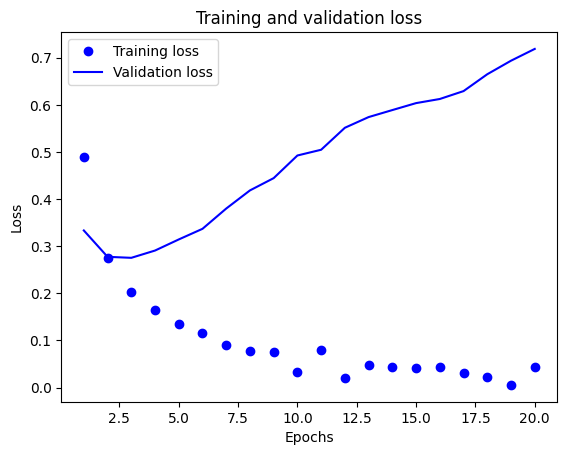

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

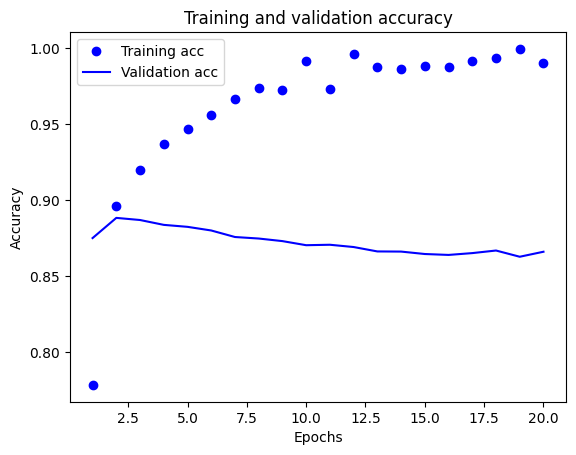

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model11 = keras.Sequential([
    layers.Dense(32, activation="tanh", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(32, activation="tanh", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model11.fit(x_train, y_train, epochs=2, batch_size=512)
results = model11.evaluate(x_test, y_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7357 - loss: 0.5301
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9012 - loss: 0.2541
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8847 - loss: 0.2830


In [ ]:
results

[0.28107792139053345, 0.8861600160598755]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model11.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.10580675],
       [0.999207  ],
       [0.7932282 ],
       ...,
       [0.06457458],
       [0.04172923],
       [0.76144785]], dtype=float32)

### Model 12 :

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model12 = keras.Sequential([
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
     layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model12.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model12.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.6671 - loss: 0.8486 - val_accuracy: 0.8708 - val_loss: 0.5550
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8797 - loss: 0.5194 - val_accuracy: 0.8843 - val_loss: 0.4716
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9104 - loss: 0.4115 - val_accuracy: 0.8874 - val_loss: 0.4357
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9236 - loss: 0.3589 - val_accuracy: 0.8851 - val_loss: 0.4255
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9447 - loss: 0.3055 - val_accuracy: 0.8865 - val_loss: 0.4235
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9471 - loss: 0.2752 - val_accuracy: 0.8833 - val_loss: 0.4249
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9572 - loss: 0.2479 - val_accuracy: 0.8813 - val_loss: 0.4186
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9693 - loss: 0.2187 - val_accuracy: 0.8810 - 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

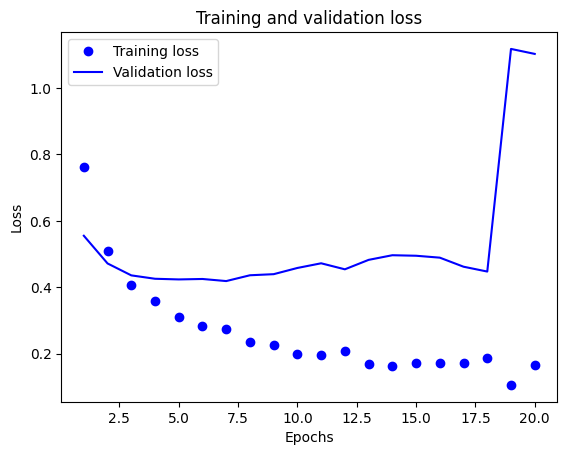

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

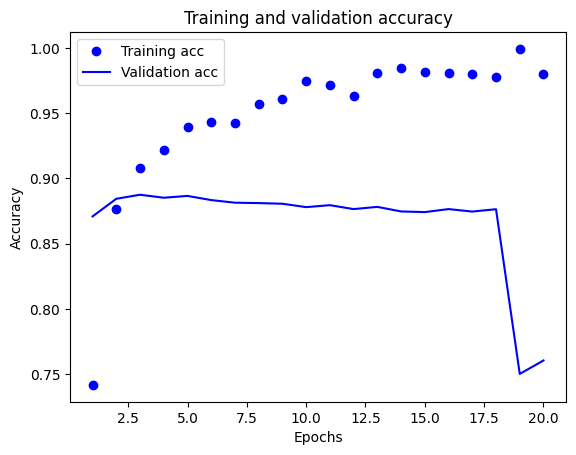

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model12 = keras.Sequential([
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model12.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model12.fit(x_train, y_train, epochs=3, batch_size=512)
results = model12.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7028 - loss: 0.7862
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8797 - loss: 0.4743
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9158 - loss: 0.3703
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8846 - loss: 0.4167


In [ ]:
results

[0.4145466387271881, 0.8860399723052979]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model12.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.19456491],
       [0.99883264],
       [0.8950928 ],
       ...,
       [0.06360639],
       [0.06896558],
       [0.62864393]], dtype=float32)

### Model 13 :

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model13 = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001), activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001), activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model13.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model13.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.7064 - loss: 0.7812 - val_accuracy: 0.8643 - val_loss: 0.5338
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8829 - loss: 0.4801 - val_accuracy: 0.8774 - val_loss: 0.4192
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9068 - loss: 0.3668 - val_accuracy: 0.8843 - val_loss: 0.3776
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9161 - loss: 0.3220 - val_accuracy: 0.8860 - val_loss: 0.3635
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9229 - loss: 0.2962 - val_accuracy: 0.8799 - val_loss: 0.3693
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9258 - loss: 0.2850 - val_accuracy: 0.8841 - val_loss: 0.3600
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9303 - loss: 0.2705 - val_accuracy: 0.8858 - val_loss: 0.3609
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9383 - loss: 0.2565 - val_accuracy: 0.8839 - v

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

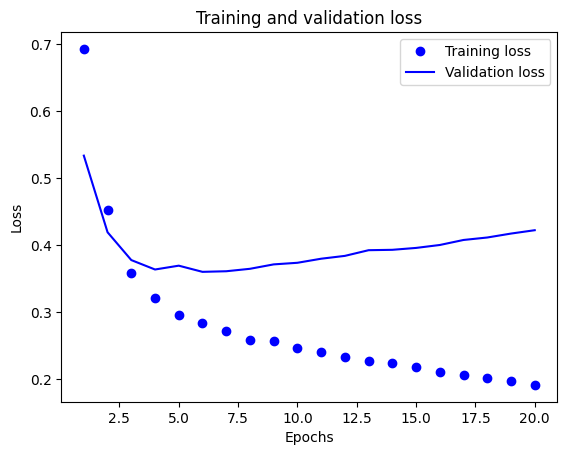

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

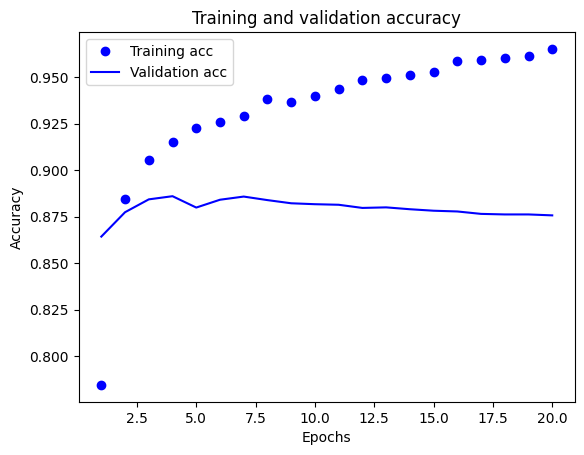

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model13 = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001), activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001), activation="relu",kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1,  activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model13.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model13.fit(x_train, y_train, epochs=4, batch_size=512)
results = model13.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7320 - loss: 0.7256
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8915 - loss: 0.3987
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9057 - loss: 0.3310
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9122 - loss: 0.3100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8839 - loss: 0.3598


In [ ]:
results

[0.3573884665966034, 0.8861600160598755]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model13.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.2757783 ],
       [0.99871904],
       [0.89091223],
       ...,
       [0.07939081],
       [0.10375603],
       [0.5859944 ]], dtype=float32)

### Model 14 :

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model14 = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model14.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model14.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.5841 - loss: 0.6643 - val_accuracy: 0.8459 - val_loss: 0.4646
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7774 - loss: 0.5059 - val_accuracy: 0.8737 - val_loss: 0.3379
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8582 - loss: 0.3739 - val_accuracy: 0.8862 - val_loss: 0.2865
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8967 - loss: 0.3065 - val_accuracy: 0.8911 - val_loss: 0.2754
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9119 - loss: 0.2484 - val_accuracy: 0.8900 - val_loss: 0.2846
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9327 - loss: 0.2053 - val_accuracy: 0.8874 - val_loss: 0.3037
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9452 - loss: 0.1775 - val_accuracy: 0.8863 - val_loss: 0.3256
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9546 - loss: 0.1471 - val_accuracy: 0.8857 - 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

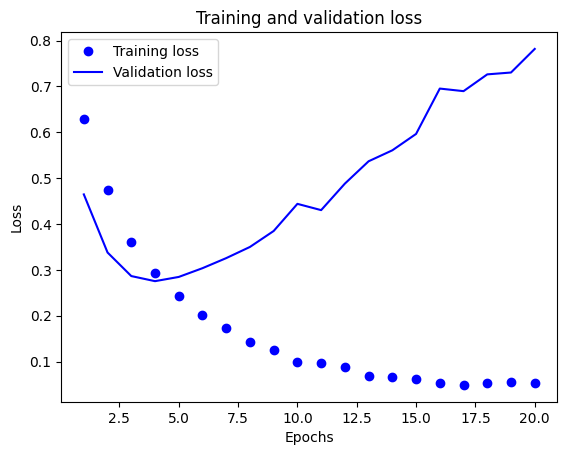

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

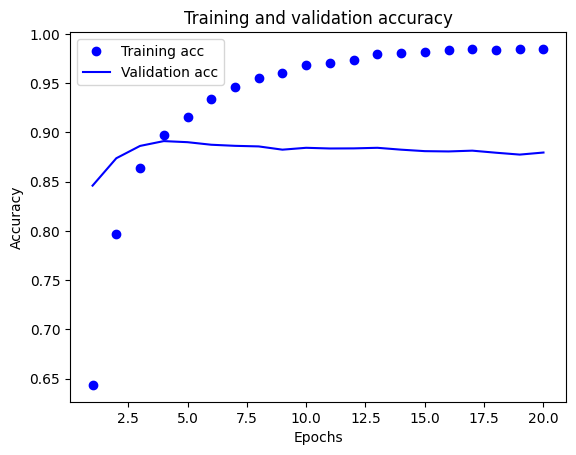

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model14 = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dropout(0.5), #Adding another layer
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model14.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model14.fit(x_train, y_train, epochs=4, batch_size=512)
results = model14.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.5973 - loss: 0.6491
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8398 - loss: 0.4110
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8880 - loss: 0.3126
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9114 - loss: 0.2506
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8906 - loss: 0.2876


In [ ]:
results

[0.2882605195045471, 0.8891599774360657]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model14.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.15271284],
       [0.9999745 ],
       [0.9931952 ],
       ...,
       [0.05926944],
       [0.10695859],
       [0.44285625]], dtype=float32)

### Model 15 :

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model15 = keras.Sequential([
    layers.Dense(8, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Removal of one layer layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model15.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model15.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.7169 - loss: 0.5955 - val_accuracy: 0.8473 - val_loss: 0.4374
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8867 - loss: 0.3848 - val_accuracy: 0.8724 - val_loss: 0.3598
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9095 - loss: 0.3039 - val_accuracy: 0.8834 - val_loss: 0.3198
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9239 - loss: 0.2549 - val_accuracy: 0.8868 - val_loss: 0.2979
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9342 - loss: 0.2215 - val_accuracy: 0.8891 - val_loss: 0.2856
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9420 - loss: 0.1968 - val_accuracy: 0.8893 - val_loss: 0.2792
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9482 - loss: 0.1774 - val_accuracy: 0.8898 - val_loss: 0.2764
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9539 - loss: 0.1614 - val_accuracy: 0.8888 - 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

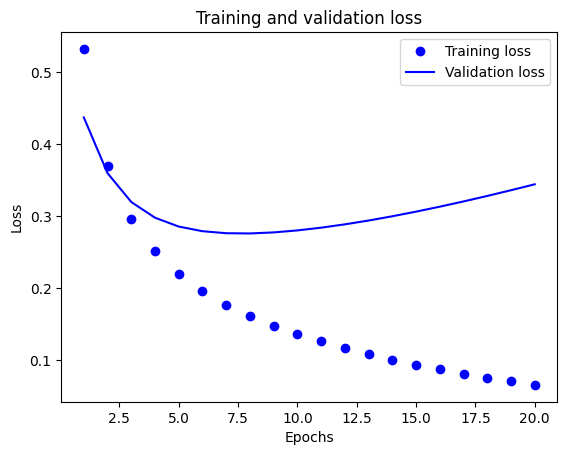

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

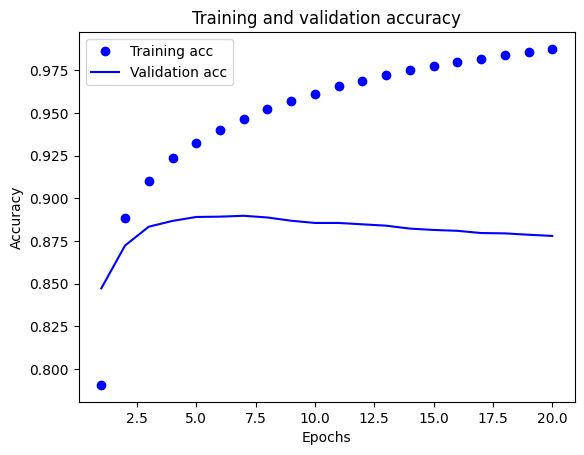

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model15 = keras.Sequential([
    layers.Dense(8, activation="relu", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model15.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model15.fit(x_train, y_train, epochs=7, batch_size=512)
results = model15.evaluate(x_test, y_test)

Epoch 1/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7536 - loss: 0.5588
Epoch 2/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8944 - loss: 0.3355
Epoch 3/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9124 - loss: 0.2652
Epoch 4/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9217 - loss: 0.2277
Epoch 5/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9296 - loss: 0.2035
Epoch 6/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9367 - loss: 0.1857
Epoch 7/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9426 - loss: 0.1717
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8848 - loss: 0.2833


In [ ]:
results

[0.28220608830451965, 0.8869600296020508]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model15.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.25957832],
       [0.9994763 ],
       [0.87771237],
       ...,
       [0.11947019],
       [0.09109302],
       [0.5784967 ]], dtype=float32)

### Model 16 :

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Define the model with a fixed random seed for weight initialization
model16 = keras.Sequential([
    layers.Dense(32, activation="tanh", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="tanh", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="tanh", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])

**Compiling the model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model16.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history = model16.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.6570 - loss: 0.6190 - val_accuracy: 0.8718 - val_loss: 0.3296
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8648 - loss: 0.3469 - val_accuracy: 0.8859 - val_loss: 0.2773
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9078 - loss: 0.2555 - val_accuracy: 0.8888 - val_loss: 0.2809
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9199 - loss: 0.2175 - val_accuracy: 0.8872 - val_loss: 0.2930
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9363 - loss: 0.1876 - val_accuracy: 0.8820 - val_loss: 0.3154
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9459 - loss: 0.1594 - val_accuracy: 0.8836 - val_loss: 0.3300
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9545 - loss: 0.1408 - val_accuracy: 0.8824 - val_loss: 0.3409
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9628 - loss: 0.1207 - val_accuracy: 0.8809 - 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

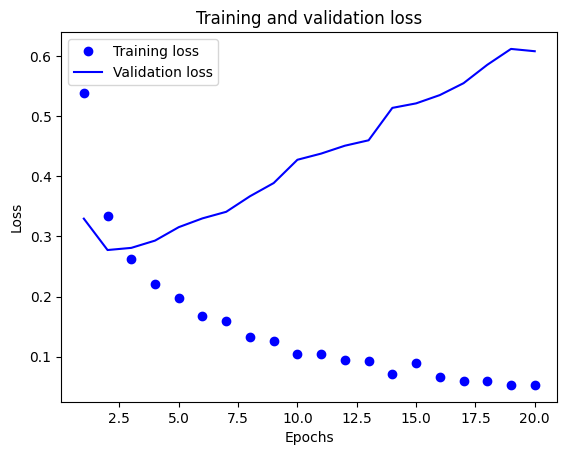

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

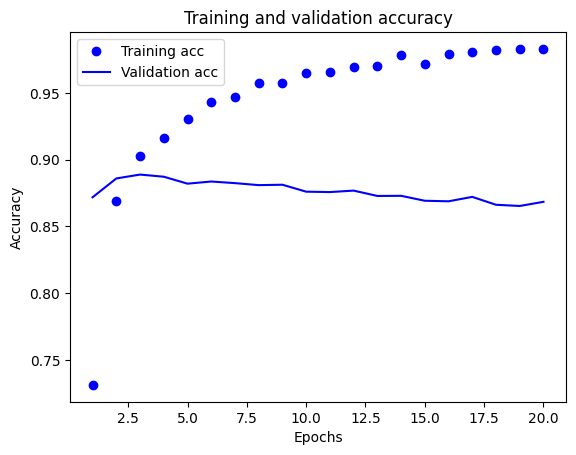

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model16 = keras.Sequential([
    layers.Dense(32, activation="tanh", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="tanh", kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dropout(0.5), #Adding another layer
    layers.Dense(32, activation="tanh", kernel_initializer=keras.initializers.GlorotUniform(seed=42)), #Adding another layer
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid", kernel_initializer=keras.initializers.GlorotUniform(seed=42))
])
model16.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model16.fit(x_train, y_train, epochs=3, batch_size=512)
results = model16.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.6862 - loss: 0.5816
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8821 - loss: 0.3048
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9086 - loss: 0.2486
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8804 - loss: 0.3107


In [ ]:
results

[0.3126238286495209, 0.8822399973869324]

### Using a trained model to generate predictions on new data

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
model16.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.08383185],
       [0.99728847],
       [0.9651006 ],
       ...,
       [0.06502999],
       [0.02110697],
       [0.63753486]], dtype=float32)